# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [ ]:
import os
import itertools
import keras
from keras.datasets import cifar10
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
train, test = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [ ]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [ ]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
  input_layer = keras.layers.Input(input_shape)
    
  for i, n_units in enumerate(num_neurons):
      if i == 0:
          x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
      else:
          x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
  
  out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
  
  model = keras.models.Model(inputs=[input_layer], outputs=[out])
  return model

In [ ]:
## 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [ ]:
results = {}

for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
  keras.backend.clear_session() # 把舊的 Graph 清掉
  print(f"LR = {lr}, Optimizer = {opti}")
  model = build_mlp(input_shape=x_train.shape[1:])
  model.summary()
  optimizer = opti(lr=lr)
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

  model.fit(x_train, y_train, 
            epochs=EPOCHS, 
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)

  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["accuracy"]
  valid_acc = model.history.history["val_accuracy"]

  exp_name_tag = "EXP-LR-%s-Optimizer-%s" % (str(lr), str(opti))
  results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

LR = 0.01, Optimizer = <class 'keras.optimizers.legacy.gradient_descent.SGD'>
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______________________________________

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 11s 51ms/step - loss: 2.0773 - accuracy: 0.2621 - val_loss: 1.9523 - val_accuracy: 0.3202
Epoch 2/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8950 - accuracy: 0.3341 - val_loss: 1.8814 - val_accuracy: 0.3276
Epoch 3/50
196/196 [==============================] - 10s 53ms/step - loss: 1.8202 - accuracy: 0.3586 - val_loss: 1.7995 - val_accuracy: 0.3701
Epoch 4/50
196/196 [==============================] - 10s 52ms/step - loss: 1.7734 - accuracy: 0.3773 - val_loss: 1.8289 - val_accuracy: 0.3266
Epoch 5/50
196/196 [==============================] - 9s 47ms/step - loss: 1.7382 - accuracy: 0.3892 - val_loss: 1.7239 - val_accuracy: 0.3973
Epoch 6/50
196/196 [==============================] - 11s 58ms/step - loss: 1.7063 - accuracy: 0.4010 - val_loss: 1.7493 - val_accuracy: 0.3800
Epoch 7/50
196/196 [==============================] - 10s 53ms/step - loss: 1.6791 - accuracy: 0.4109 - val_loss: 1.7862 - val_accuracy: 

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 12s 58ms/step - loss: 10.4141 - accuracy: 0.1264 - val_loss: 2.2288 - val_accuracy: 0.1559
Epoch 2/50
196/196 [==============================] - 11s 58ms/step - loss: 2.2002 - accuracy: 0.1646 - val_loss: 2.1707 - val_accuracy: 0.1419
Epoch 3/50
196/196 [==============================] - 11s 58ms/step - loss: 2.0812 - accuracy: 0.2048 - val_loss: 2.0257 - val_accuracy: 0.2385
Epoch 4/50
196/196 [==============================] - 12s 61ms/step - loss: 2.0048 - accuracy: 0.2485 - val_loss: 2.3446 - val_accuracy: 0.1814
Epoch 5/50
196/196 [==============================] - 11s 58ms/step - loss: 1.9507 - accuracy: 0.2772 - val_loss: 1.9600 - val_accuracy: 0.2747
Epoch 6/50
196/196 [==============================] - 12s 61ms/step - loss: 1.9147 - accuracy: 0.2981 - val_loss: 2.0128 - val_accuracy: 0.2701
Epoch 7/50
196/196 [==============================] - 12s 60ms/step - loss: 1.8926 - accuracy: 0.3052 - val_loss: 2.0056 - val_accuracy

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adagrad.py:84: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 11s 56ms/step - loss: 2.0071 - accuracy: 0.2744 - val_loss: 1.8553 - val_accuracy: 0.3318
Epoch 2/50
196/196 [==============================] - 10s 49ms/step - loss: 1.8130 - accuracy: 0.3532 - val_loss: 1.8020 - val_accuracy: 0.3572
Epoch 3/50
196/196 [==============================] - 9s 45ms/step - loss: 1.7355 - accuracy: 0.3838 - val_loss: 1.7665 - val_accuracy: 0.3813
Epoch 4/50
196/196 [==============================] - 10s 51ms/step - loss: 1.6820 - accuracy: 0.4004 - val_loss: 1.7658 - val_accuracy: 0.3769
Epoch 5/50
196/196 [==============================] - 10s 50ms/step - loss: 1.6376 - accuracy: 0.4206 - val_loss: 1.6626 - val_accuracy: 0.4159
Epoch 6/50
196/196 [==============================] - 9s 47ms/step - loss: 1.6042 - accuracy: 0.4314 - val_loss: 1.7348 - val_accuracy: 0.3809
Epoch 7/50
196/196 [==============================] - 9s 47ms/step - loss: 1.5757 - accuracy: 0.4442 - val_loss: 1.6425 - val_accuracy: 0.

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 12s 56ms/step - loss: 3.1122 - accuracy: 0.2675 - val_loss: 1.8243 - val_accuracy: 0.3304
Epoch 2/50
196/196 [==============================] - 11s 54ms/step - loss: 1.7924 - accuracy: 0.3522 - val_loss: 1.8115 - val_accuracy: 0.3512
Epoch 3/50
196/196 [==============================] - 10s 51ms/step - loss: 1.7283 - accuracy: 0.3783 - val_loss: 1.7055 - val_accuracy: 0.3835
Epoch 4/50
196/196 [==============================] - 10s 49ms/step - loss: 1.6971 - accuracy: 0.3892 - val_loss: 1.6741 - val_accuracy: 0.4067
Epoch 5/50
196/196 [==============================] - 11s 54ms/step - loss: 1.6641 - accuracy: 0.4023 - val_loss: 1.7892 - val_accuracy: 0.3602
Epoch 6/50
196/196 [==============================] - 11s 54ms/step - loss: 1.6328 - accuracy: 0.4127 - val_loss: 1.6694 - val_accuracy: 0.4026
Epoch 7/50
196/196 [==============================] - 11s 55ms/step - loss: 1.6145 - accuracy: 0.4179 - val_loss: 1.6344 - val_accuracy:

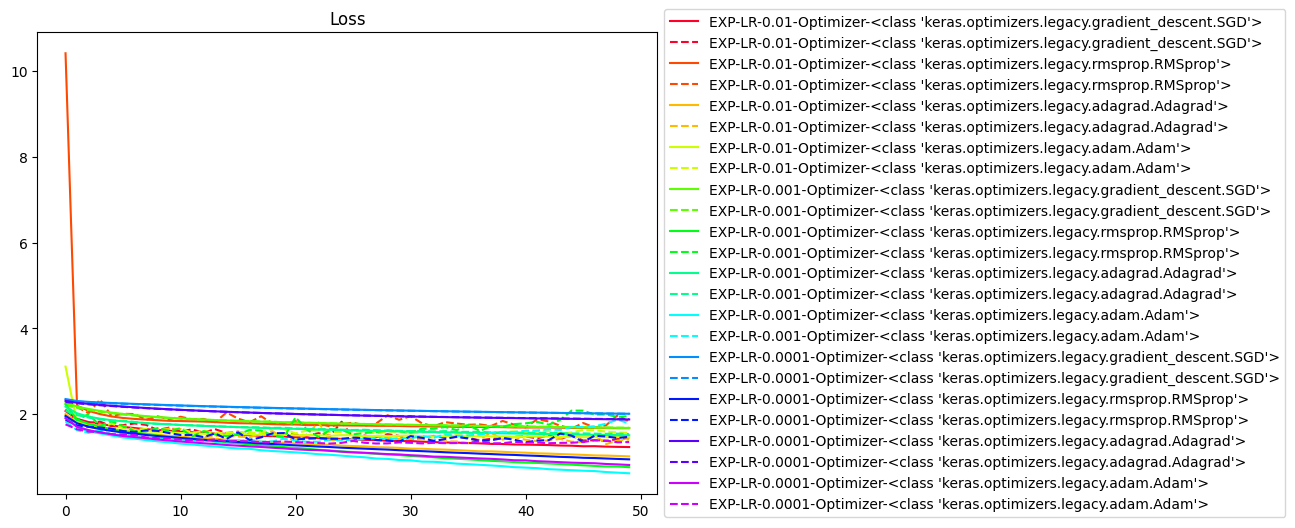

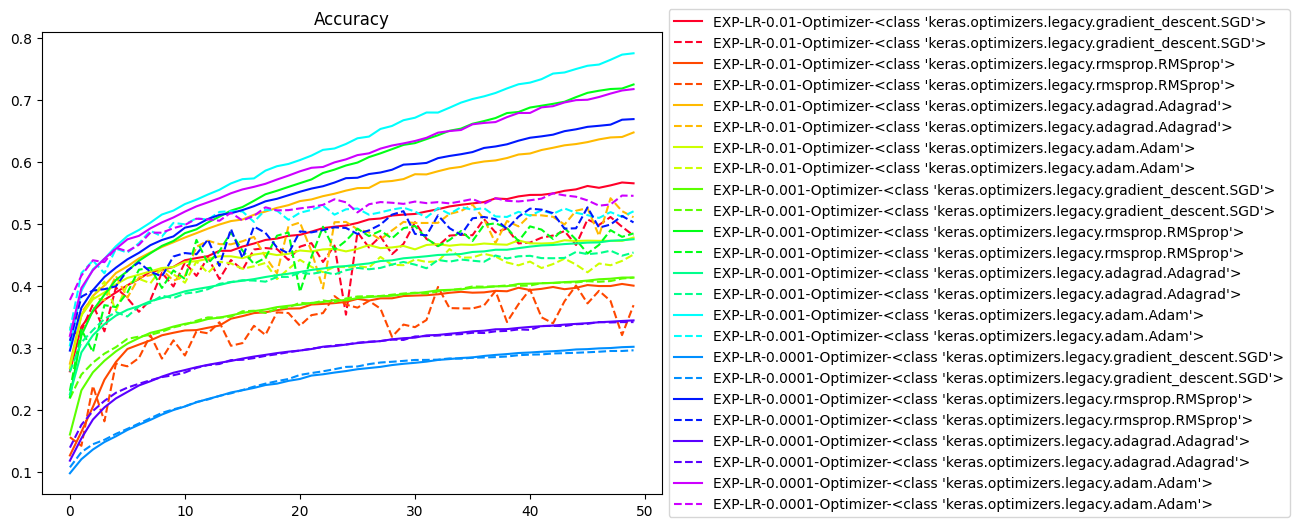

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()